# Learning and Decision Making

## Laboratory 1: PageRank

In the end of the lab, you should export the notebook to a Python script (File >> Download as >> Python (.py)). Your file should be named `padi-lab1-groupXX.py`, where the `XX` corresponds to your group number and should be submitted to the e-mail <adi.tecnico@gmail.com>. 

Make sure...

* **... that the subject is of the form `[<group n.>] LAB <lab n.>`.** 

* **... to strictly respect the specifications in each activity, in terms of the intended inputs, outputs and naming conventions.** 

In particular, after completing the activities you should be able to replicate the examples provided (although this, in itself, is no guarantee that the activities are correctly completed).

### 1. The Markov chain model

Consider once again the document web problem described in the Homework and for which you wrote a Markov chain model. In this lab you will interact with a larger version of the same problem. You will use a Markov chain based on a provided web of documents and investigate the relation between the PageRank algorithm and the stable behavior of the chain.

Recall that your chain should describe the motion of a bot navigating the provided document web, where, upon arriving at a document, the bot will select, uniformly at random, one of the links in that document and follow that link.

$$\diamond$$

In this first activity, you will implement your Markov chain model in Python. You will start by loading the transition probability matrix from a `numpy` binary file, using the `numpy` function `load`. You will then consider the state space to consist of all valid indices for the loaded transition matrix, each represented as a string. For example, if the transition probability matrix is $20\times 20$, the states should include the strings `'0'` to `'19'`. 

---

#### Activity 1.        

Write a function named `load_chain` that receives, as input, a string corresponding to the name of the file with a transition matrix to be loaded, and a real number $\gamma$ between $0$ and $1$. Assume that: 

* The transition matrix in the file has been built from some web of documents, where the appropriate transitions for sink nodes have already been added.

* The "teleporting" artifact described in the course's lecture notes **has not** been added.

Your function should build the transition probability matrix for the chain by adding the teleport mechanism, where the value of $\gamma$ is the teleporting probability. Your function should then return, as output, a two-element tuple corresponding to the Markov chain, where:

* ... the first element is a tuple containing the state-space; 
* ... the second element is a `numpy` array corresponding to the transition probability matrix for the chain.

**Note**: Don't forget to import `numpy`.

---

In [58]:
import numpy as np
from numpy import load, empty

def load_chain(transition_matrix, gamma):
    matrix = load(transition_matrix)
    matrix = matrix * (1 - gamma)
    matrix = matrix + (gamma / len(matrix[0]))
    states = [str(x) for x in range(len(matrix[0]))]
    
    return (states, matrix)

You can use the files `citations.npy` and `example.npy` provided to test your code:

* The first corresponds to the transition probabilities for a bot that navigates a web of connected PhD students, where there is a link between from student $x$ to student $y$ if the two have collaborated in a paper together. 

* The second corresponds to the web of documents in the book PageRank example.

In both cases, according to the previous specification, the transition probabilities for sink nodes have been corrected but no teleporting probabilities have been added.

We provide below an example of application of the function with the files `citations.npy` and `example.npy`, that you can use as a first "sanity check" for your code.

```python
import numpy.random as rand

M = load_chain('citations.npy', 0.11)

rand.seed(42)

print('Number of states:', len(M[0]))
print('Random state:', M[0][rand.randint(len(M[0]))])

M = load_chain('example.npy', 0.11)
print('Number of states:', len(M[0]))
print('Transition probabilities:')
print(M[1])
```

Output:
```
Number of states: 1883
Random state: 1126
Number of states: 11
Transition probabilities:
[[0.01  0.9   0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01 ]
 [0.01  0.01  0.455 0.455 0.01  0.01  0.01  0.01  0.01  0.01  0.01 ]
 [0.01  0.455 0.01  0.01  0.01  0.01  0.01  0.455 0.01  0.01  0.01 ]
 [0.01  0.01  0.01  0.01  0.455 0.01  0.01  0.01  0.455 0.01  0.01 ]
 [0.01  0.01  0.01  0.01  0.01  0.9   0.01  0.01  0.01  0.01  0.01 ]
 [0.01  0.01  0.01  0.01  0.01  0.01  0.9   0.01  0.01  0.01  0.01 ]
 [0.01  0.01  0.01  0.01  0.455 0.455 0.01  0.01  0.01  0.01  0.01 ]
 [0.099 0.099 0.099 0.099 0.099 0.099 0.099 0.01  0.099 0.099 0.099]
 [0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.9   0.01 ]
 [0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.9   0.01  0.01 ]
 [0.01  0.01  0.01  0.01  0.01  0.01  0.9   0.01  0.01  0.01  0.01 ]]
 ```

In the next activity, you will use the Markov chain model to evaluate the likelihood of any given path for the bot.

---

#### Activity 2.

Write a function `prob_trajectory` that receives, as inputs, 

* ... a Markov chain in the form of a tuple like the one returned by the function in Activity 1;
* ... a trajectory, corresponding to a sequence of states (i.e., a tuple or list of strings, each string corresponding to a state).

Your function should return, as output, a floating point number corresponding to the probability of observing the provided trajectory. 

---

In [59]:
def prob_trajectory(m_tuple, states_list):
    probability = 1
    matrix = m_tuple[1]
    
    for i in range(len(states_list) - 1):
        probability *= matrix[int(states_list[i]), int(states_list[i + 1])]
        
    return probability

Example of application of the function with the chain $M$ from Activity 1 (example in the book).

```python
print('Prob. of trajectory (1, 3, 8):', prob_trajectory(M, ('1', '3', '8')))
print('Prob. of trajectory (2, 7, 0, 1, 3):', prob_trajectory(M, ('2', '7', '0', '1', '3')))
print('Prob. of trajectory (1, 2, 1):', prob_trajectory(M, ('1', '2', '1')))
print('Prob. of trajectory (1, 3, 1):', prob_trajectory(M, ('1', '3', '1')))
```

Output:
```
Prob. of trajectory (1, 3, 8): 0.20702500000000001
Prob. of trajectory (2, 7, 0, 1, 3): 0.0184459275
Prob. of trajectory (1, 2, 1): 0.20702500000000001
Prob. of trajectory (1, 3, 1): 0.00455
```

### 2. Stability

The next activities explore the notion of *stationary distribution* for the chain, a central concept in the the PageRank algorithm.

---

#### Activity 3

Write a function `stationary_dist` that receives, as input, a Markov chain in the form of a tuple like the one returned by the function in Activity 1. Your function should, as output, a `numpy` array corresponding to a row vector containing the stationary distribution for the chain.

**Note:** The stationary distribution is a *left* eigenvector of the transition probability matrix associated to the eigenvalue 1. As such, you may find useful the numpy function `numpy.linalg.eig`. Also, recall that the stationary distribution is *a distribution*.

---

In [60]:
np.set_printoptions(precision=3)
def stationary_dist(m_tuple):
    matrix = m_tuple[1]
    transpose = matrix.T
    
    left = np.linalg.eig(transpose)[1][:,0].T.real
    left_sum = np.sum(left)
    
    return left / left_sum


Example of application of the function with the chain $M$ from Activity 1.

```python
u_star = stationary_dist(M)

print('Stationary distribution:')
print(u_star)

u_prime = u_star.dot(M[1])

print('\nIs u* * P = u*?', np.all(np.isclose(u_prime, u_star)))
```

Output:
```
Stationary distribution:
[0.012 0.035 0.027 0.027 0.117 0.209 0.209 0.022 0.168 0.161 0.012]

Is u* * P = u*? True
```

To complement Activity 3, you will now empirically establish that the chain is ergodic, i.e., no matter where the bot starts, its visitation frequency will eventually converge to the stationary distribution.

---

#### Activity 4.

Write a function `compute_dist` that receives, as inputs, 

* ... a Markov chain in the form of a tuple like the one returned by the function in Activity 1;
* ... a row vector (a numpy nd array) corresponding to the initial distribution for the chain;
* ... an integer $N$, corresponding to the number of steps that the bot is expected to take.

Your function should return, as output, a row vector (a `numpy` array) containing the distribution after $N$ steps of the chain.

---

In [61]:
def compute_dist(m_tuple, nd_array, N):
    matrix = m_tuple[1]
    matrix = np.linalg.matrix_power(matrix, N)
    
    return np.dot(nd_array, matrix)


Example of application of the function with the chain $M$ from Activity 1.

```python
# Number of states
nS = len(M[0])

# Initial, uniform distribution
u = np.ones((1, nS)) / nS

# Distrbution after 100 steps
v = compute_dist(M, u, 10)
print('\nIs u * P^10 = u*?', np.all(np.isclose(v, u_star)))

# Distrbution after 1000 steps
v = compute_dist(M, u, 100)
print('\nIs u * P^100 = u*?', np.all(np.isclose(v, u_star)))
```

Output:
```
Is u * P^10 = u*? False

Is u * P^100 = u*? True
```

Is the chain ergodic? Justify, based on the results above.

<span style="color:blue">_Given our implementation of the teleport mechanism the chain is irreducible, aperiodic and, therefore, tends to a stationary distribution. As the number of iterations grows, the following generalization is observed:_
</span>

$\lim_{t\to\infty} \mu_0P^t=\mu^*$

<span style="color:blue">_Which leads to the conclusion that the chain is ergodic._</span>

### 3. Simulation

In this part of the lab, you will *simulate* the actual bot, and empirically compute the visitation frequency of each state.

---

#### Activity 5

Write down a function `simulate` that receives, as inputs, 

* ... a Markov chain in the form of a tuple like the one returned by the function in Activity 1;
* ... a row vector (a numpy nd array) corresponding to the initial distribution for the chain;
* ... an integer $N$, corresponding to the number of steps that the bot is expected to take.

Your function should return, as output, a tuple containing a trajectory of $N$ steps obtained from the initial distribution provided. Each element in the tuple should be a string corresponding to a state index.

---

**Note:** You may find useful to import the numpy module `numpy.random`.

In [62]:
import numpy.random as rnd

def simulate(m_tuple, nd_array, N):
    nd_cumsum = np.cumsum(nd_array)
    trajectory = ()
    matrix = m_tuple[1]
    random = rnd.rand()
    current_state = ''
    
    for i in range(len(nd_array)):
        if random < nd_cumsum[i]:
            current_state = str(i)
            break 
    
    trajectory += (current_state,)
    
    for i in range(N - 1):
        random = rnd.rand()
        
        probability_row = np.cumsum(matrix[int(current_state)])
        
        for j in range(len(probability_row)):
            if random < probability_row[j]:
                current_state = str(j)
                break
                
        trajectory += (current_state,)
        
    return trajectory


Example of application of the function with the chain $M$ from Activity 1.

```python
# Number of states
nS = len(M[0])

# Initial, uniform distribution
u = np.ones((1, nS)) / nS

rnd.seed(42)

# Simulate short trajectory
traj = simulate(M, u, 10)
print(traj)

# Simulate a long trajectory
traj = simulate(M, u, 10000)
```

Output:
```
('4', '6', '5', '6', '4', '5', '5', '6', '5', '6')
```

---

#### Activity 6

Draw a histogram of the $10,000$-step trajectory generated in the example of Activity #5 using the function `hist` from the module `matplotlib.pyplot`. Make sure that the histogram has one bin for each state. Compare the relative frequencies with the result of Activity #3.

**Note**: Don't forget to load `matplotlib`. 

**Note 2**: Recall that the states in the trajectory from Activity #5 consist of strings, which should be converted to state indices to match the entries in the distribution computed in Activity #3.

---

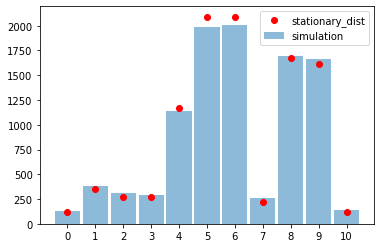

In [51]:
import matplotlib.pyplot as plt

# Simulate a long trajectory
traj = simulate(M, u, 10000)

states, counters = np.unique(traj, return_counts=True)

predicted = np.round(stationary_dist(M)*10000,0).astype(int)

bins=[i for i in range(len(states)+1)]

plt.hist([int(i) for i in traj], bins, alpha=0.5, label='simulation', rwidth=0.9, align = 'left')
plt.xticks([i for i in range(len(states))])
a = [[u_star[i] * 10000] for i in range(len(u_star))]
plt.plot(a, 'ro',label='stationary_dist')
plt.legend(loc='upper right')
plt.show()